# Project 10 Microbiology sequence modelling CV ([VPAgs-Dataset4ML](https://data.mendeley.com/datasets/w78tyrjz4z/1))

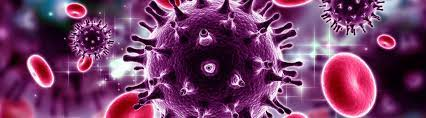


### Project Rules:
- Use object Oriented Programming.
- Use Pytorch-Lightning. 
- Do not use pre-trained models.
- ○	Create three pytorch classes:
■	First Class for loading and preprocessing the data
■	Second Class for dataset
■	Third Class for building the model.


### Project Protocol:  
- Select one of the problems above
- Download the dataset of the selected problem.
- Read/load the problem’s dataset.
- Identify the features and the targets.
- Perform the necessary preprocessing steps (if needed).
- Split data into Training, Validation, and Testing sets (if needed).
- Design the architecture for building the model.
- Define the loss function and the performance measures.
- Train and Validate the model using (Train and validation sets).
- Plot the loss/performance of Train and Validation using both tensorboard and matplotlib.
- Evaluate the model using the Test set.

## About the dataset

##### VPAgs-Dataset4ML: A Dataset to Predict Viral Protective Antigens for Machine Learning-Based Reverse Vaccinology.

This dataset contains 2,145 viral protein sequences, with positive.fasta containing 210 protective antigens (PAgs) and negative.fasta containing 1,935 non-protective protein sequences. The PAgs are the result of quality checks performed on viral PAgs from the publicly available Protegen database. The non-protective protein sequences were chosen using computational steps carried out on viral protein sequences in UniProt, a well-known and freely accessible protein sequence database. Researchers may benefit from VPAgs-Dataset4ML in developing machine learning models to predict viral protective antigens as potential vaccine candidates. This information could be used by vaccinologists to help develop effective vaccines that could help save patients' lives.

## Background of the Dataset

SARS-CoV-2 is the virus responsible for causing the COVID-19 disease. COVID-19 is an infectious illness that primarily affects the respiratory system. Diseases: fever, cough, shortness of breath, common cold, COVID-19.

#### How the SARS-CoV-2 virus (COVID-19) attacks human cells and replicates as follows:
1. Entry into the body: The virus enters the body through respiratory droplets when an infected person coughs, sneezes, talks, or breathes, and these droplets are inhaled by others.

2. Attachment and penetration: The virus's spike protein binds to ACE2 receptors on the surface of respiratory tract cells, facilitating its entry into the cell.

3. Hijacking the cell: Once inside the cell, the virus releases its RNA, which is the genetic material. This RNA carries the instructions for the cell to produce new viral particles.

4. Transcription and Translation: Inside the human cell, the viral RNA undergoes transcription, a process where the double-stranded RNA is converted into single-stranded RNA. This process takes place inside the cell nucleus. The newly formed single-stranded RNA moves to the cytoplasm, where translation occurs. During translation, the RNA is used to synthesize long chains of amino acids, which then fold and form 3D structures called proteins.

5. Replication and assembly: The cell's machinery uses the viral RNA and host cell components to produce new viral RNA and proteins.

6. Release of new virus particles: The newly assembled viral RNA and proteins come together to form complete virus particles. These new virus particles are then released from the infected cell, ready to infect more cells and continue the cycle.

In summary, the virus uses its spike protein to attach to ACE2 receptors on the surface of human respiratory cells, enters the cell, and releases its RNA. Inside the cell, the viral RNA undergoes transcription and translation, leading to the production of viral proteins. The virus then hijacks the cell's machinery to replicate and assemble new virus particles, which are released to infect other cells. This process allows the virus to multiply and spread throughout the body.


#### Amino acids:
These amino acids are the building blocks of proteins and play crucial roles in protein structure and function.
https://www.youtube.com/watch?v=gG7uCskUOrA&ab_channel=yourgenome
There are the standard one-letter codes for the 20 naturally occurring amino acids commonly found in proteins. Each letter represents a specific amino acid:

A: Alanine
C: Cysteine
D: Aspartic Acid
E: Glutamic Acid
F: Phenylalanine
G: Glycine
H: Histidine
I: Isoleucine
K: Lysine
L: Leucine
M: Methionine
N: Asparagine
P: Proline
Q: Glutamine
R: Arginine
S: Serine
T: Threonine
V: Valine
W: Tryptophan
Y: Tyrosine
Revised text:

These letters, in specific combinations and bonded arrangements, form proteins. Our objective is to identify proteins that possess specific attributes.

Example 1:
ACDEFGHIKLMNPQRSTVWY (actual protein / vaccine candidate)
HIKLMNPQRSTVWYACDEFGHIK (not a vaccine candidate)

The arrangements of these letters provide crucial insights into identifying actual proteins that serve as potential vaccine candidates.

Example 2:
In the case of COVID-19 virus, certain proteins act as prime vaccine candidates.
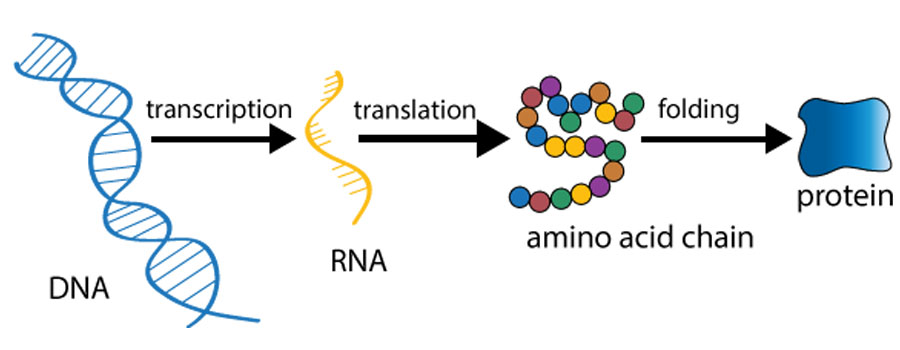

#### Vaccine candidates
Vaccine candidates often include the spike protein or specific parts of a protein that are primarily responsible for attaching to human cells, as I explained earlier. Human cells have receptors that readily bind to these specific parts, which are known as antigens. Our goal is to predict these antigens so that we can design antibodies that can easily attach to the virus even before it attaches to our cells. By identifying and targeting these antigens, we aim to develop effective antibodies that provide early defence against the virus.

#### Defense Mechanism and White Blood Cells
The immune system is responsible for protecting the body from foreign invaders, including viruses and bacteria.
White blood cells, including T cells, B cells, and various types of lymphocytes, play essential roles in the immune response.
T cells are responsible for recognizing and directly attacking infected cells in the body. They identify cells that display viral antigens on their surface and destroy them, preventing further virus replication.
B cells, on the other hand, produce antibodies that can recognize and bind to specific viral antigens. When antibodies attach to viral antigens, it can neutralize the virus, making it easier for other immune cells to engulf and clear the virus.
Lymphocytes are a type of white blood cell that plays a central role in coordinating and regulating the immune response.

1. Virus protein/specific position of protein (Antigen) 
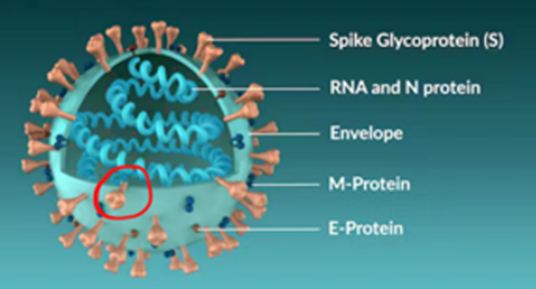
2. B cell releases antibody that attaches with antigen part of virus.

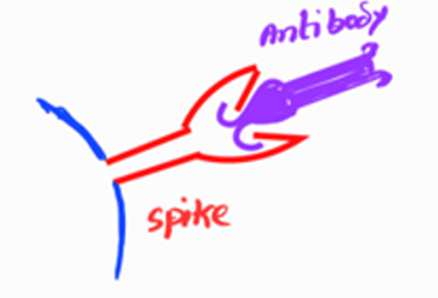

3. White blood cell is eating a virus after antibodies attached with antigen part of virus(red).
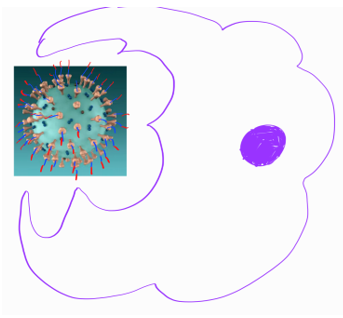

# Libraries

In [26]:
import seaborn as sns
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from time import time
import torch.distributions as tdis
from torch import nn
from torch.utils.data import TensorDataset, RandomSampler, BatchSampler, DataLoader
sns.set_style('dark')
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
import torch.nn.utils.rnn as rnn_utils
from pytorch_lightning.callbacks import LearningRateMonitor
from torch.utils import data

# Read/Load files...

In [2]:
## Define FASTA reader and TXT reader
def read_from_file_with_enter(filename):
    fr = open(filename,'r')
    sample = ""
    samples = []
    for line in fr:
        if line.startswith('>'):
            sample = ""
            continue
        if line.startswith('\n'):
            samples.append(sample)
            continue
        sample += line[:-1]
    return samples

def ReadTxtName(rootdir):
    lines = []
    with open(rootdir, 'r') as file_to_read:
        while True:
            line = file_to_read.readline()
            if not line:
                break
            line = line.strip('\n')
            lines.append(line)
    return lines

In [3]:
file = r'PositiveT.txt'
datasetT1 = read_from_file_with_enter(file)
print('Postive T cell epitope length:', len(datasetT1))

file = r'NegativeT.txt'
datasetT2 = ReadTxtName(file)

datasetT2 = [0] * 774
for i in range(774):
    datasetT2[i] = datasetT1[(i + 1) * 2 - 1]

print('Negative T cell epitope length:', len(datasetT2))

## Prepare B-cell Epitope dataset:

file = r'PositiveB.txt'
datasetB1 = ReadTxtName(file)

file = r'NegativeB.txt'
datasetB2 = ReadTxtName(file)

print("Postive B cell epitope length:", len(datasetB1))
print("Negative B cell epitope length:", len(datasetB2))

file = r'Antigen.txt'
datasetA = ReadTxtName(file)
print("Length of antigen dataset:", len(datasetA)) # Inside this file positive and negative both antigents exists


Postive T cell epitope length: 2000
Negative T cell epitope length: 774
Postive B cell epitope length: 4925
Negative B cell epitope length: 4925
Length of antigen dataset: 3809


### Creating DataFrames..

In [4]:
df_positive_T = pd.DataFrame({'Positive T cell epitope': datasetT1})
df_negative_T = pd.DataFrame({'Negative T cell epitope': datasetT2})
df_positive_B = pd.DataFrame({'Positive B cell epitope': datasetB1})
df_negative_B = pd.DataFrame({'Negative B cell epitope': datasetB2})
df_antigen = pd.DataFrame({'Antigen': datasetA})

In [5]:
df_positive_T

,Positive T cell epitope
0,MTEQQWNFAGIEAAAS
1,STEGNVTGMFA
2,DAATAQTLQAFLHWAITDGN
3,AHPADPGSRPHLIRLFSRDA
4,ITREEKPAVTAAPKK
...,...
1995,LPISETGGGTPELRCGKHQA
1996,AMKRKVNLKTQQSQHPTDAL
1997,ITDNPYMTSIPVNAFQGLC
1998,LNKNKYLTVIDKDAFG


In [6]:
df_negative_T

,Negative T cell epitope
0,STEGNVTGMFA
1,AHPADPGSRPHLIRLFSRDA
2,TLDISNNRLESLPAH
3,HVGQSASRGRGLGENPDDEE
4,EDLTLNDLETDVCTMDKCAG
...,...
769,GWYRSPFSRVVH
770,QQYDIKYTWNVPKIAPKSE
771,QQYDIKYTWNVPKIAPK
772,QQYDIKYTWNVPKIA


In [7]:
df_positive_B

,Positive B cell epitope
0,PSSSATSSNA
1,PGIMAPPPGM
2,AASDISLLDA
3,DLMLGPLVLS
4,HQDTNAAPAG
...,...
4920,PQQPQQSFPQ
4921,GVFFGGLGIG
4922,IFTITKILLA
4923,RTSMCSIQSA


In [8]:
df_negative_B

,Negative B cell epitope
0,GKEIRTPKTW
1,SKQRISNIYN
2,PKVKCMVPYC
3,NQESLINNQF
4,YNYIIRNTYK
...,...
4920,IDLYMGDIFE
4921,LTGRDILQPW
4922,ISEPAVRNFT
4923,RAIGWQDRAR


In [9]:
df_antigen

,Antigen
0,MFHAFPTYNVTLWETLMDHLKSHWKVKPPVSSDSELFNLLMVESFK...
1,RPRVYTITAADDYQFSSQYQPGGVTITLFSANIDAITSLSIGGELV...
2,MEGLTPLQRREVVGLILSLTSSVSISSGDLIPLYERLSAIEKMCTT...
3,GRMVGGIGRFYIQMCTELKLTDYEGRLIQNSITIERMVLSAFDERR...
4,MEWNTFFLVILVIIIKSTTSQITQRPPVENISTYHVDWDTPLYTHP...
...,...
3804,>YP_001197641.1
3805,MSKQKVVTNLLLSTAVLGGFLICHAPSVSAETGNLQEIPTESATVS...
3806,GDKQAPEEKLVSSDSTREESATQVATDPDAPSQSLSVSGAEISTAD...
3807,EQIRKAVSIEKISADNDEIKWKVTFDRKNWTFSGEGSGYYFILPKG...


## Some statistics

In [10]:
df_positive_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Positive T cell epitope  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [11]:
df_positive_T.describe()

,Positive T cell epitope
count,2000
unique,981
top,HSLGKWLGHPDKF
freq,6


In [12]:
df_negative_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Negative T cell epitope  774 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [13]:
df_negative_T.describe()

,Negative T cell epitope
count,774
unique,490
top,SLKLMATLFSTYASAD
freq,4


In [14]:
df_positive_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Positive B cell epitope  4925 non-null   object
dtypes: object(1)
memory usage: 38.6+ KB


In [15]:
df_positive_B.describe()

,Positive B cell epitope
count,4925
unique,4871
top,GRGRGRGRGR
freq,6


In [16]:
df_negative_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Negative B cell epitope  4925 non-null   object
dtypes: object(1)
memory usage: 38.6+ KB


In [17]:
df_negative_B.describe()

,Negative B cell epitope
count,4925
unique,4918
top,GGKTGIAVMI
freq,2


In [18]:
df_antigen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Antigen  3809 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [19]:
df_antigen.describe()

,Antigen
count,3809
unique,3406
top,
freq,399


## Get the distribution of the data
- Define the distribution based on the plot

Top 10 most frequent Positive T cell epitopes:
Positive T cell epitope
HSLGKWLGHPDKF       6
ATSLSPFYLRPPSFLR    6
SLKLMATLFSTYASAD    6
KNKIERNHKY          3
YANVPWLSRN          3
GFYVLENDYS          3
ENDYSANGGT          3
ANGGTIHPTI          3
IHPTILCVYG          3
GADLAGADLA          3
Name: count, dtype: int64


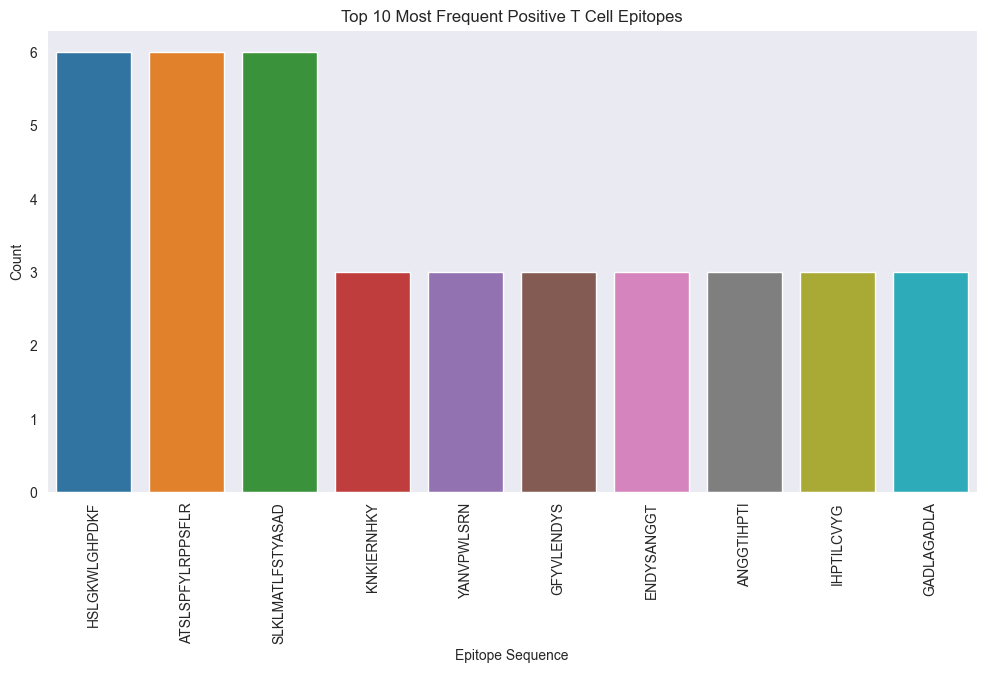

In [20]:
top_10_positive_T = df_positive_T['Positive T cell epitope'].value_counts().nlargest(10)

# the top 10 most frequent Positive T cell epitopes
print("Top 10 most frequent Positive T cell epitopes:")
print(top_10_positive_T)

# Plotting a count plot to visualize the top 10 most frequent Positive T cell epitopes
plt.figure(figsize=(12, 6))
sns.countplot(data=df_positive_T, x='Positive T cell epitope', order=top_10_positive_T.index)
plt.title("Top 10 Most Frequent Positive T Cell Epitopes")
plt.xlabel("Epitope Sequence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


Top 10 most frequent Negative T cell epitopes:
Negative T cell epitope
SLKLMATLFSTYASAD                  4
HSLGKWLGHPDKF                     4
FVNQHLCGSHLVEALYLVCGERGFFYTPKA    2
YANVPWLSRN                        2
VQCTVAEWVL                        2
TNNPENPITE                        2
KNKIERNHKY                        2
IHPTILCVYG                        2
ENDYSANGGT                        2
NLFGATLVNA                        2
Name: count, dtype: int64


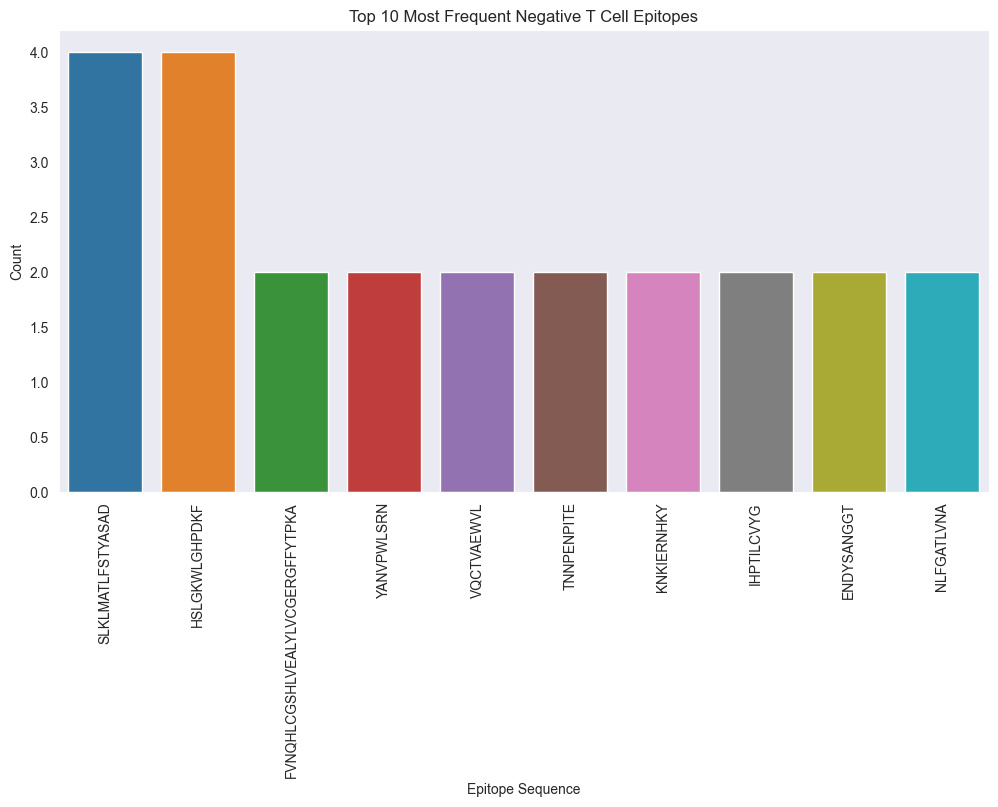

In [21]:
top_10_negative_T = df_negative_T['Negative T cell epitope'].value_counts().nlargest(10)

# the top 10 most frequent Negative T cell epitopes
print("Top 10 most frequent Negative T cell epitopes:")
print(top_10_negative_T)

# Plotting a count plot to visualize the top 10 most frequent Negative T cell epitopes
plt.figure(figsize=(12, 6))
sns.countplot(data=df_negative_T, x='Negative T cell epitope', order=top_10_negative_T.index)
plt.title("Top 10 Most Frequent Negative T Cell Epitopes")
plt.xlabel("Epitope Sequence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Top 10 most frequent Positive B cell epitopes:
Positive B cell epitope
GRGRGRGRGR    6
PNANPNANPN    5
RGRGRGRGRG    5
GQQPGQGQQG    3
PPAAGPPAAG    3
EPPVVHGCPL    2
GGMPGGMPGG    2
GQQQPFPPQQ    2
VLPPPPPPPP    2
GGWGQPHGGG    2
Name: count, dtype: int64


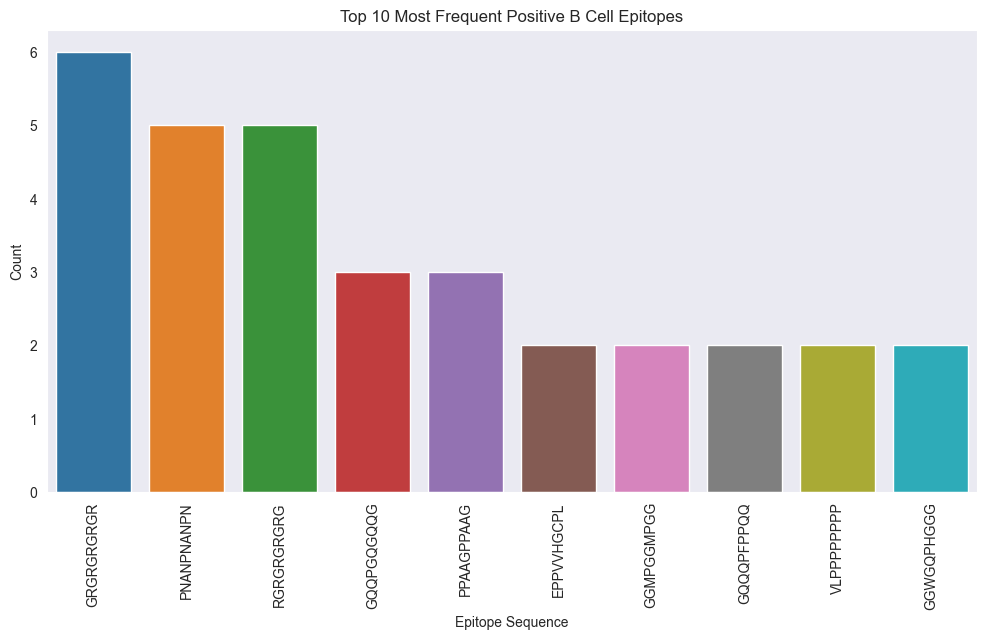

In [22]:
# the top 10 most frequent Positive B cell epitopes
top_10_positive_B = df_positive_B['Positive B cell epitope'].value_counts().nlargest(10)

# the top 10 most frequent Positive B cell epitopes
print("Top 10 most frequent Positive B cell epitopes:")
print(top_10_positive_B)

# Plot a count plot to visualize the top 10 most frequent Positive B cell epitopes
plt.figure(figsize=(12, 6))
sns.countplot(data=df_positive_B, x='Positive B cell epitope', order=top_10_positive_B.index)
plt.title("Top 10 Most Frequent Positive B Cell Epitopes")
plt.xlabel("Epitope Sequence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Top 10 most frequent Negative B cell epitopes:
Negative B cell epitope
GGKTGIAVMI    2
LAENAYGQDN    2
AKSPAEAKSP    2
ASIIGILHLI    2
TLGALGGGAV    2
NCGWHCISAI    2
GQHRIKIEEL    2
IEGPVIGIDL    1
KPGLDTIPGI    1
FILERGEYPR    1
Name: count, dtype: int64


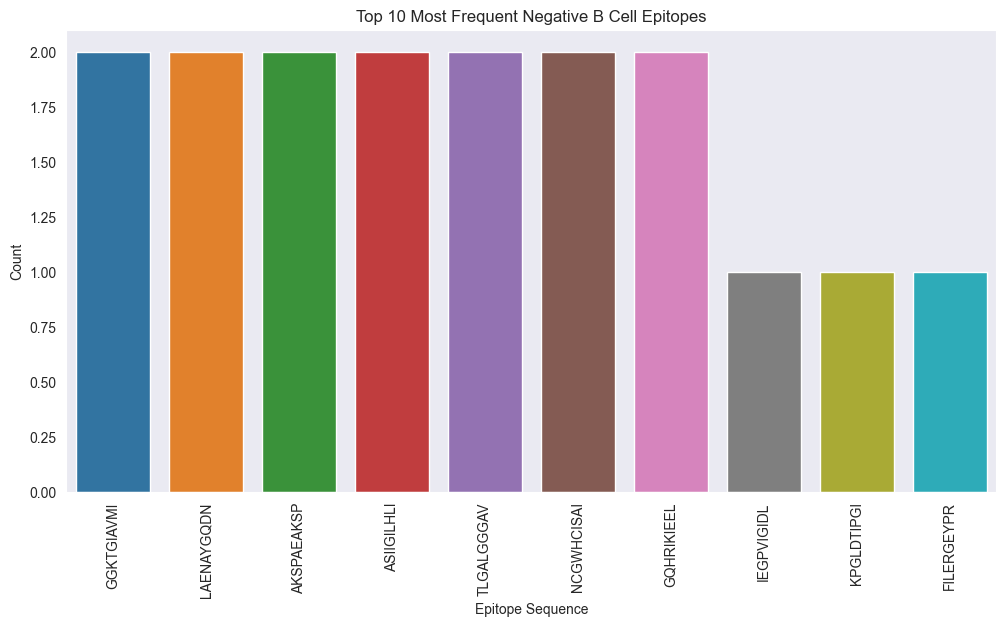

In [23]:
# the top 10 most frequent Negative B cell epitopes
top_10_negative_B = df_negative_B['Negative B cell epitope'].value_counts().nlargest(10)

# Print the top 10 most frequent Negative B cell epitopes
print("Top 10 most frequent Negative B cell epitopes:")
print(top_10_negative_B)

# Plotting a count plot to visualize the top 10 most frequent Negative B cell epitopes
plt.figure(figsize=(12, 6))
sns.countplot(data=df_negative_B, x='Negative B cell epitope', order=top_10_negative_B.index)
plt.title("Top 10 Most Frequent Negative B Cell Epitopes")
plt.xlabel("Epitope Sequence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Identify the features and the targets:

In this project, the goal is to build a machine learning model to predict viral protective antigens (PAgs) for potential vaccine candidates using sequence data. The dataset consists of various viral protein sequences, with positive samples containing protective antigens (PAgs) and negative samples containing non-protective protein sequences.

**Features:**
The features in this dataset are the viral protein sequences represented as strings. There are four datasets used in the project for different types of epitopes (T-cell epitopes and B-cell epitopes) and antigens:

1. Positive T cell epitope (datasetT1): Contains viral protein sequences with positive samples of T-cell epitopes.
2. Negative T cell epitope (datasetT2): Contains viral protein sequences with negative samples of T-cell epitopes.
3. Positive B cell epitope (datasetB1): Contains viral protein sequences with positive samples of B-cell epitopes.
4. Negative B cell epitope (datasetB2): Contains viral protein sequences with negative samples of B-cell epitopes.
5. Antigen dataset (datasetA): Contains viral protein sequences of both positive and negative antigens.

**Targets:**
The targets in this project are the labels that indicate whether a viral protein sequence is a protective antigen (PAg) or not. These labels are not explicitly mentioned in the provided code, but we can infer them from the structure of the data:
- Training set
1. For the T cell epitopes, the targets can be inferred as follows:
   - Positive T cell epitope (datasetT1): Positive targets (PAgs) labeled as 1.
   - Negative T cell epitope (datasetT2): Negative targets (non-PAgs) labeled as 0.
- Test set
2. For the B cell epitopes, the targets can be inferred as follows:
   - Positive B cell epitope (datasetB1): Positive targets (PAgs) labeled as 1.
   - Negative B cell epitope (datasetB2): Negative targets (non-PAgs) labeled as 0.

3. For the Antigen dataset (datasetA), the targets can be inferred based on the description:
   - Positive antigens: Positive targets (PAgs) labeled as 1.
   - Negative antigens: Negative targets (non-PAgs) labeled as 0.

## Class for loading and preprocessing the data
-  ■	Perform the necessary preprocessing steps (if needed).

In [24]:
class AntigenDataLoader:
    def __init__(self, aminoacids='ACDEFGHIKLMNPQRSTVWY'):
        self.aminoacids = aminoacids
    
    def read_from_file_with_enter(self, filename):
        fr = open(filename, 'r')
        sample = ""
        samples = []
        for line in fr:
            if line.startswith('>'):
                sample = ""
                continue
            if line.startswith('\n'):
                samples.append(sample)
                continue
            sample += line[:-1]
        return samples
    
    def ReadTxtName(self, rootdir):
        lines = []
        with open(rootdir, 'r') as file_to_read:
            while True:
                line = file_to_read.readline()
                if not line:
                    break
                line = line.strip('\n')
                lines.append(line)
        return lines
    
    def load_data(self):
        file = r'PositiveT.txt'
        datasetT1 = self.read_from_file_with_enter(file)
        print('Postive T cell epitope length:', len(datasetT1))

        file = r'NegativeT.txt'
        datasetT2 = self.ReadTxtName(file)
        datasetT2 = datasetT2[:len(datasetT1)] 
        print('Negative T cell epitope length:', len(datasetT2))

        file = r'PositiveB.txt'
        datasetB1 = self.ReadTxtName(file)
        datasetB1 = datasetB1[:len(datasetT1)]  

        file = r'NegativeB.txt'
        datasetB2 = self.ReadTxtName(file)
        datasetB2 = datasetB2[:len(datasetT1)]  

        print("Postive B cell epitope length:", len(datasetB1))
        print("Negative B cell epitope length:", len(datasetB2))

        file = r'Antigen.txt'
        datasetA = self.ReadTxtName(file)
        datasetA = datasetA[:len(datasetT1)]  
        print("Length of antigen dataset:", len(datasetA))

        return datasetT1, datasetT2, datasetB1, datasetB2, datasetA
    
    def preprocess_data(self, dataset):
        # Find the maximum sequence length in the dataset
        max_length = max(len(sequence) for sequence in dataset)

        # Pad all sequences to the maximum length
        padded_dataset = [sequence + 'X' * (max_length - len(sequence)) for sequence in dataset]

        # One-hot encode the sequences
        return torch.stack([self.one_hot_encoding(sequence) for sequence in padded_dataset])
    
    def one_hot_encoding(self, sequence):
        encoding = torch.zeros(len(sequence), len(self.aminoacids))
        for i, amino_acid in enumerate(sequence):
            try:
                encoding[i, self.aminoacids.index(amino_acid)] = 1
            except ValueError:
                # If the amino acid is not found in the aminoacids, set it to a special 'unknown' encoding
                encoding[i, -1] = 1
        return encoding

## Class for dataset

In [27]:
class AntigenDataset(data.Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, index):
        return self.sequences[index], self.labels[index]

## Class for building the model

### ■	Split data into Training, Validation, and Testing sets (if needed).
### ■	Define the loss function and the performance measures.
### ■	Train and Validate the model using (Train and validation sets).


In [28]:
class AntigenModel(pl.LightningModule):
    def __init__(self, input_size, num_classes, hidden_size=128):
        super(AntigenModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True, on_epoch=True)        
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('val_loss', loss, prog_bar=True, on_epoch=True)  
        return loss

        
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        _, predicted = torch.max(y_hat.data, 1)
        correct = (predicted == y).sum().item()
        return correct

    def test_epoch_end(self, outputs):
        total_correct = sum(outputs)
        total_samples = len(self.test_dataloader().dataset)
        test_accuracy = total_correct / total_samples
        
    
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return optimizer    

## Evaluate the model using the Test set

In [29]:
# Modify the custom_collate_fn
def custom_collate_fn(batch):
    # Separate sequences and labels from the batch
    sequences, labels = zip(*batch)

    # Pad sequences to the maximum length in the batch using pad_sequence
    padded_sequences = rnn_utils.pad_sequence(sequences, batch_first=True)

    # Convert the sequences and labels to tensors and return the batch
    return padded_sequences, torch.tensor(labels)

def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            sequences, labels = data
            sequences = sequences.to(device)
            labels = labels.to(device)

            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


def train_model(data_loader, batch_size=10, num_epochs=10, val_split=0.1):
    # Load and preprocess the data
    datasetT1, datasetT2, datasetB1, datasetB2, datasetA = data_loader.load_data()
    datasetT1 = data_loader.preprocess_data(datasetT1)
    datasetT2 = data_loader.preprocess_data(datasetT2)
    datasetB1 = data_loader.preprocess_data(datasetB1)
    datasetB2 = data_loader.preprocess_data(datasetB2)
    datasetA = data_loader.preprocess_data(datasetA)

    labels_T1 = [1] * len(datasetT1)
    labels_T2 = [0] * len(datasetT2)
    labels_B1 = [1] * len(datasetB1)
    labels_B2 = [0] * len(datasetB2)
    labels_A = [1] * len(datasetA)

    # Create dataset objects
    dataset_T1 = AntigenDataset(datasetT1, labels_T1)
    dataset_T2 = AntigenDataset(datasetT2, labels_T2)
    dataset_B1 = AntigenDataset(datasetB1, labels_B1)
    dataset_B2 = AntigenDataset(datasetB2, labels_B2)
    dataset_A = AntigenDataset(datasetA, labels_A)

    # Combine the datasets
    combined_dataset = torch.utils.data.ConcatDataset([dataset_T1, dataset_T2, dataset_B1, dataset_B2, dataset_A])

    # Split data into Training and Validation sets
    train_size = 1.0 - val_split
    train_dataset, val_dataset = torch.utils.data.random_split(combined_dataset, [int(len(combined_dataset)*train_size), int(len(combined_dataset)*val_split)])

    # Create data loaders with the modified custom_collate_fn
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, collate_fn=custom_collate_fn)
    test_loader = torch.utils.data.DataLoader(combined_dataset, batch_size=batch_size, collate_fn=custom_collate_fn)  # Use the same collate_fn for testing
   
    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    model = AntigenModel(input_size=len(data_loader.aminoacids), num_classes=2)

    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    # Initialize empty lists to store training and validation losses
    train_losses = []
    val_losses = []
    val_accuracies = []
    train_accuracies = []  

    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    model = AntigenModel(input_size=len(data_loader.aminoacids), num_classes=2)

    num_epochs = 10


    # Train the model and get the training history
    for epoch in range(num_epochs):
        trainer.fit(model, train_loader, val_loader)

        # Evaluate the model using the validation set to get accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

    
        # Calculate and print training accuracy
        model.train()  # Set the model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        training_accuracy = correct / total
        train_accuracies.append(training_accuracy)

    # Evaluate the model using the test set
    test_model(model, test_loader, device='cpu')
    
    # Calculate final training, validation, and test accuracies
    final_train_accuracy = train_accuracies[-1]
    final_val_accuracy = val_accuracies[-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.3f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.3f}")

    # Return the model and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Create the data loader and train the model
data_loader = AntigenDataLoader()
# Train the model and get the training history
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(data_loader, batch_size=64, num_epochs=10, val_split=0.1)     

Postive T cell epitope length: 2000
Negative T cell epitope length: 2000
Postive B cell epitope length: 2000
Negative B cell epitope length: 2000
Length of antigen dataset: 2000


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

D:\Jupyter\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
D:\Jupyter\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
D:\Jupyter\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:615: UserWarning: Checkpoint directory D:\Jupyter\Integrify\Deep Learning projects - Integrify\Project 10 Microbiology sequence modelling CV\Project 10\lightning_logs\version_78\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | lstm      | LSTM             | 76.8 K
1 | fc        | Linear           | 258   
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
77.1 K    Trainable params
0         Non-trainable params
77.1 K    Total params
0.308     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Test Accuracy: 58.59%
Final Training Accuracy: 0.601
Final Validation Accuracy: 0.591


## ■	Design the architecture for building the model.

In [30]:
# Printing the model
print(model)

AntigenModel(
  (lstm): LSTM(20, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (criterion): CrossEntropyLoss()
)


## Improving the model to get good accuracy 
- Increasing number of epochs

In [ ]:
class AntigenDataLoader:
    def __init__(self, alphabet='ACDEFGHIKLMNPQRSTVWY'):
        self.alphabet = alphabet
    
    def read_from_file_with_enter(self, filename):
        fr = open(filename, 'r')
        sample = ""
        samples = []
        for line in fr:
            if line.startswith('>'):
                sample = ""
                continue
            if line.startswith('\n'):
                samples.append(sample)
                continue
            sample += line[:-1]
        return samples
    
    def ReadTxtName(self, rootdir):
        lines = []
        with open(rootdir, 'r') as file_to_read:
            while True:
                line = file_to_read.readline()
                if not line:
                    break
                line = line.strip('\n')
                lines.append(line)
        return lines
    
    def load_data(self):
        file = r'PositiveT.txt'
        datasetT1 = self.read_from_file_with_enter(file)
        print('Postive T cell epitope length:', len(datasetT1))

        file = r'NegativeT.txt'
        datasetT2 = self.ReadTxtName(file)
        datasetT2 = datasetT2[:len(datasetT1)] 
        print('Negative T cell epitope length:', len(datasetT2))

        file = r'PositiveB.txt'
        datasetB1 = self.ReadTxtName(file)
        datasetB1 = datasetB1[:len(datasetT1)] 

        file = r'NegativeB.txt'
        datasetB2 = self.ReadTxtName(file)
        datasetB2 = datasetB2[:len(datasetT1)]  

        print("Postive B cell epitope length:", len(datasetB1))
        print("Negative B cell epitope length:", len(datasetB2))

        file = r'Antigen.txt'
        datasetA = self.ReadTxtName(file)
        datasetA = datasetA[:len(datasetT1)] 
        print("Length of antigen dataset:", len(datasetA))

        return datasetT1, datasetT2, datasetB1, datasetB2, datasetA
    
    def preprocess_data(self, dataset):
        # Find the maximum sequence length in the dataset
        max_length = max(len(sequence) for sequence in dataset)

        # Pad all sequences to the maximum length
        padded_dataset = [sequence + 'X' * (max_length - len(sequence)) for sequence in dataset]

        # One-hot encode the sequences
        return torch.stack([self.one_hot_encoding(sequence) for sequence in padded_dataset])
    
    def one_hot_encoding(self, sequence):
        encoding = torch.zeros(len(sequence), len(self.alphabet))
        for i, amino_acid in enumerate(sequence):
            try:
                encoding[i, self.alphabet.index(amino_acid)] = 1
            except ValueError:
                # If the amino acid is not found in the alphabet, set it to a special 'unknown' encoding
                encoding[i, -1] = 1
        return encoding


class AntigenDataset(data.Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, index):
        return self.sequences[index], self.labels[index]

class AntigenModel(pl.LightningModule):
    def __init__(self, input_size, num_classes, hidden_size=128):
        super(AntigenModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True, on_epoch=True)        
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('val_loss', loss, prog_bar=True, on_epoch=True)  
        return loss

        
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        _, predicted = torch.max(y_hat.data, 1)
        correct = (predicted == y).sum().item()
        return correct

    def test_epoch_end(self, outputs):
        total_correct = sum(outputs)
        total_samples = len(self.test_dataloader().dataset)
        test_accuracy = total_correct / total_samples
        
    
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return optimizer
    
import torch.nn.utils.rnn as rnn_utils

# Modify the custom_collate_fn
def custom_collate_fn(batch):
    # Separate sequences and labels from the batch
    sequences, labels = zip(*batch)

    # Pad sequences to the maximum length in the batch using pad_sequence
    padded_sequences = rnn_utils.pad_sequence(sequences, batch_first=True)

    # Convert the sequences and labels to tensors and return the batch
    return padded_sequences, torch.tensor(labels)

def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            sequences, labels = data
            sequences = sequences.to(device)
            labels = labels.to(device)

            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

    
def train_model(data_loader, batch_size=10, num_epochs=64, val_split=0.1):
    # Load and preprocess the data
    datasetT1, datasetT2, datasetB1, datasetB2, datasetA = data_loader.load_data()
    datasetT1 = data_loader.preprocess_data(datasetT1)
    datasetT2 = data_loader.preprocess_data(datasetT2)
    datasetB1 = data_loader.preprocess_data(datasetB1)
    datasetB2 = data_loader.preprocess_data(datasetB2)
    datasetA = data_loader.preprocess_data(datasetA)

    labels_T1 = [1] * len(datasetT1)
    labels_T2 = [0] * len(datasetT2)
    labels_B1 = [1] * len(datasetB1)
    labels_B2 = [0] * len(datasetB2)
    labels_A = [1] * len(datasetA)

    # Create dataset objects
    dataset_T1 = AntigenDataset(datasetT1, labels_T1)
    dataset_T2 = AntigenDataset(datasetT2, labels_T2)
    dataset_B1 = AntigenDataset(datasetB1, labels_B1)
    dataset_B2 = AntigenDataset(datasetB2, labels_B2)
    dataset_A = AntigenDataset(datasetA, labels_A)

    # Combine the datasets
    combined_dataset = torch.utils.data.ConcatDataset([dataset_T1, dataset_T2, dataset_B1, dataset_B2, dataset_A])

    # Split data into Training and Validation sets
    train_size = 1.0 - val_split
    train_dataset, val_dataset = torch.utils.data.random_split(combined_dataset, [int(len(combined_dataset)*train_size), int(len(combined_dataset)*val_split)])

    # Create data loaders with the modified custom_collate_fn
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, collate_fn=custom_collate_fn)
    test_loader = torch.utils.data.DataLoader(combined_dataset, batch_size=batch_size, collate_fn=custom_collate_fn)  # Use the same collate_fn for testing
   
    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    model = AntigenModel(input_size=len(data_loader.alphabet), num_classes=2)

    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    # Initialize empty lists to store training and validation losses
    train_losses = []
    val_losses = []
    val_accuracies = []
    train_accuracies = []  # To store training accuracies for each epoch

    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()])

    model = AntigenModel(input_size=len(data_loader.alphabet), num_classes=2)

    num_epochs = 64

    # Train the model and get the training history
    for epoch in range(num_epochs):
        trainer.fit(model, train_loader, val_loader)

        # Evaluate the model using the validation set to get accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

    
        # Calculate and print training accuracy
        model.train()  # Set the model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        training_accuracy = correct / total
        train_accuracies.append(training_accuracy)

    # Evaluate the model using the test set
    test_model(model, test_loader, device='cpu')
    
    # Calculate final training, validation, and test accuracies
    final_train_accuracy = train_accuracies[-1]
    final_val_accuracy = val_accuracies[-1]
    print(f"Final Training Accuracy: {final_train_accuracy:.3f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.3f}")

    # Return the model and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# Create the data loader and train the model
data_loader = AntigenDataLoader()
# Train the model and get the training history
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(data_loader, batch_size=64, num_epochs=64, val_split=0.1)     

In [4]:
class AntigenDataLoader:
    def __init__(self, aminoacids='ACDEFGHIKLMNPQRSTVWY'):
        self.aminoacids = aminoacids
    
    def read_from_file_with_enter(self, filename):
        fr = open(filename, 'r')
        sample = ""
        samples = []
        for line in fr:
            if line.startswith('>'):
                sample = ""
                continue
            if line.startswith('\n'):
                samples.append(sample)
                continue
            sample += line[:-1]
        return samples
    
    def ReadTxtName(self, rootdir):
        lines = []
        with open(rootdir, 'r') as file_to_read:
            while True:
                line = file_to_read.readline()
                if not line:
                    break
                line = line.strip('\n')
                lines.append(line)
        return lines
    
    def load_data(self):
        file = r'PositiveT.txt'
        datasetT1 = self.read_from_file_with_enter(file)
        print('Postive T cell epitope length:', len(datasetT1))

        file = r'NegativeT.txt'
        datasetT2 = self.ReadTxtName(file)
        datasetT2 = datasetT2[:len(datasetT1)] 
        print('Negative T cell epitope length:', len(datasetT2))

        file = r'PositiveB.txt'
        datasetB1 = self.ReadTxtName(file)
        datasetB1 = datasetB1[:len(datasetT1)] 

        file = r'NegativeB.txt'
        datasetB2 = self.ReadTxtName(file)
        datasetB2 = datasetB2[:len(datasetT1)] 

        print("Postive B cell epitope length:", len(datasetB1))
        print("Negative B cell epitope length:", len(datasetB2))

        file = r'Antigen.txt'
        datasetA = self.ReadTxtName(file)
        datasetA = datasetA[:len(datasetT1)] 
        print("Length of antigen dataset:", len(datasetA))

        return datasetT1, datasetT2, datasetB1, datasetB2, datasetA
    
    def preprocess_data(self, dataset):
        # Find the maximum sequence length in the dataset
        max_length = max(len(sequence) for sequence in dataset)

        # Pad all sequences to the maximum length
        padded_dataset = [sequence + 'X' * (max_length - len(sequence)) for sequence in dataset]

        # One-hot encode the sequences
        return torch.stack([self.one_hot_encoding(sequence) for sequence in padded_dataset])
    
    def one_hot_encoding(self, sequence):
        encoding = torch.zeros(len(sequence), len(self.aminoacids))
        for i, amino_acid in enumerate(sequence):
            try:
                encoding[i, self.aminoacids.index(amino_acid)] = 1
            except ValueError:
                # If the amino acid is not found in the aminoacids, set it to a special 'unknown' encoding
                encoding[i, -1] = 1
        return encoding


class AntigenDataset(data.Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, index):
        return self.sequences[index], self.labels[index]

class ComplexAntigenModel(pl.LightningModule):
    def __init__(self, input_size, num_classes, hidden_size=128, num_layers=2, dropout=0.2):
        super(ComplexAntigenModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.dropout = dropout
        
        # Define a multi-layer LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        
        # Add a dropout layer
        self.dropout_layer = nn.Dropout(dropout)
        
        # Add a fully connected layer for classification
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 because of bidirectional LSTM
        
        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout_layer(out)  
        out = self.fc(out[:, -1, :]) 
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, prog_bar=True, on_epoch=True)        
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('val_loss', loss, prog_bar=True, on_epoch=True)  
        return loss

        
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        _, predicted = torch.max(y_hat.data, 1)
        correct = (predicted == y).sum().item()
        return correct

    def test_epoch_end(self, outputs):
        total_correct = sum(outputs)
        total_samples = len(self.test_dataloader().dataset)
        test_accuracy = total_correct / total_samples
        return test_accuracy
        
    
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return optimizer
    
import torch.nn.utils.rnn as rnn_utils

def custom_collate_fn(batch):
    sequences, labels = zip(*batch)
    padded_sequences = rnn_utils.pad_sequence(sequences, batch_first=True)
    return padded_sequences, torch.tensor(labels)

def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            sequences, labels = data
            sequences = sequences.to(device)
            labels = labels.to(device)

            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    return test_accuracy
    
def train_model(data_loader, batch_size=10, num_epochs=10, val_split=0.1):
    # Load and preprocess the data
    datasetT1, datasetT2, datasetB1, datasetB2, datasetA = data_loader.load_data()
    datasetT1 = data_loader.preprocess_data(datasetT1)
    datasetT2 = data_loader.preprocess_data(datasetT2)
    datasetB1 = data_loader.preprocess_data(datasetB1)
    datasetB2 = data_loader.preprocess_data(datasetB2)
    datasetA = data_loader.preprocess_data(datasetA)

    labels_T1 = [1] * len(datasetT1)
    labels_T2 = [0] * len(datasetT2)
    labels_B1 = [1] * len(datasetB1)
    labels_B2 = [0] * len(datasetB2)
    labels_A = [1] * len(datasetA)

    # Create dataset objects
    dataset_T1 = AntigenDataset(datasetT1, labels_T1)
    dataset_T2 = AntigenDataset(datasetT2, labels_T2)
    dataset_B1 = AntigenDataset(datasetB1, labels_B1)
    dataset_B2 = AntigenDataset(datasetB2, labels_B2)
    dataset_A = AntigenDataset(datasetA, labels_A)

    # Combine the datasets
    combined_dataset = torch.utils.data.ConcatDataset([dataset_T1, dataset_T2, dataset_B1, dataset_B2, dataset_A])

    # Split data into Training and Validation sets
    train_size = 1.0 - val_split
    train_dataset, val_dataset = torch.utils.data.random_split(combined_dataset, [int(len(combined_dataset)*train_size), int(len(combined_dataset)*val_split)])
    
    num_workers = 0
    # Create data loaders with the modified custom_collate_fn
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn,num_workers=num_workers)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, collate_fn=custom_collate_fn,num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(combined_dataset, batch_size=32, collate_fn=custom_collate_fn,num_workers=num_workers)
   
    # Create a PyTorch Lightning Trainer with default logger and LearningRateMonitor callback
    trainer = pl.Trainer(max_epochs=num_epochs, log_every_n_steps=10, callbacks=[LearningRateMonitor()], accumulate_grad_batches=4)


    # Create the model
    model = ComplexAntigenModel(input_size=len(data_loader.aminoacids), num_classes=2)

    # Initialize empty lists to store training and validation losses
    train_losses = []
    val_losses = []
    val_accuracies = []
    train_accuracies = []

    # Train the model and get the training history
    for epoch in range(num_epochs):
        trainer.fit(model, train_loader, val_loader)

        # Evaluate the model using the validation set to get accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)

    
        # Calculate and print training accuracy
        model.train()  # Set the model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                sequences, labels = data
                sequences = sequences.to('cpu')
                labels = labels.to('cpu')
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        training_accuracy = correct / total
        train_accuracies.append(training_accuracy)

    # Evaluate the model using the test set
    test_accuracy = test_model(model, test_loader,  device='cpu')

    
    print(f"Training Accuracy: {train_accuracies[-1] * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracies[-1] * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    return model, train_losses, val_losses, train_accuracies, val_accuracies


# Create the data loader and train the model
data_loader = AntigenDataLoader()
# Train the model and get the training history
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(data_loader, batch_size=64, num_epochs=10, val_split=0.1)

Postive T cell epitope length: 2000
Negative T cell epitope length: 2000
Postive B cell epitope length: 2000
Negative B cell epitope length: 2000
Length of antigen dataset: 2000


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
D:\Jupyter\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:615: UserWarning: Checkpoint directory D:\Jupyter\Integrify\Deep Learning projects - Integrify\Project 10 Microbiology sequence modelling CV\Project 10\lightning_logs\version_77\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 548 K 
1 | dropout_layer | Dropout          | 0     
2 | fc            | Linear           | 514   
3 | criterion     | CrossEntropyLoss | 0     
---------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
2.198     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Training Accuracy: 60.64%
Validation Accuracy: 57.30%
Test Accuracy: 59.15%


## ■	Plot the loss/performance of Train and Validation using both tensorboard and matplotlib.

In [31]:
import re

def extract_data_from_log(log_file):
    epoch_loss_pattern = re.compile(r"Epoch (\d+): Training Loss at step \d+: (\d+\.\d+)")
    
    with open(log_file, 'r') as f:
        log_lines = f.readlines()

    data = {
        'Epochs': [],
        'Training Loss': []
    }

    for line in log_lines:
        epoch_loss_match = epoch_loss_pattern.search(line)
        if epoch_loss_match:
            epoch = int(epoch_loss_match.group(1))
            loss = float(epoch_loss_match.group(2))
            data['Epochs'].append(epoch)
            data['Training Loss'].append(loss)

    return data

# the log file path is 'microbiology_result.txt'
log_file = 'microbiology_result.txt'

# Extract data from the log file
data = extract_data_from_log(log_file)

df = pd.DataFrame(data)

df.to_excel('microbiology_training_loss.xlsx', index=False)

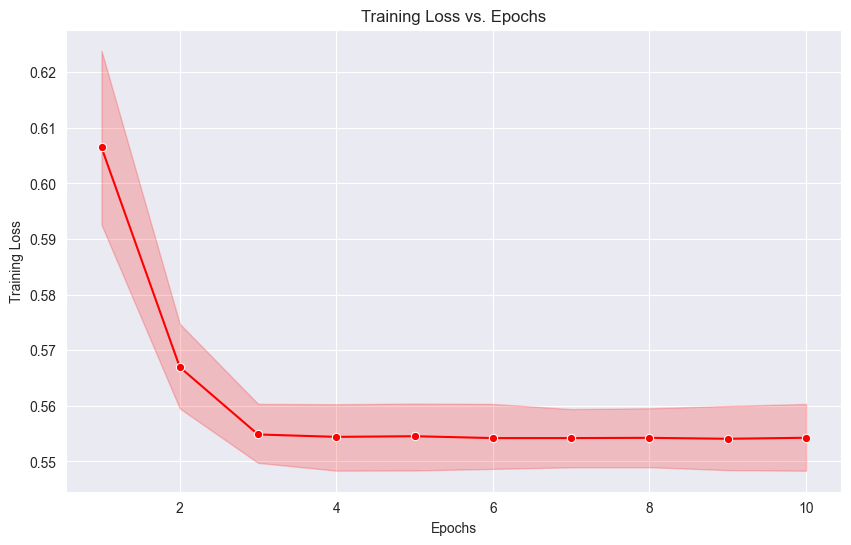

In [32]:
# Read the data from the Excel file
df = pd.read_excel('microbiology_training_loss.xlsx')

# Convert commas to dots in the 'Training Loss' column
df['Training Loss'] = df['Training Loss'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Plot training loss as a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epochs', y='Training Loss', marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.grid(True)
plt.show()

In [33]:
import re

def extract_data_from_log(log_file):
    epoch_loss_pattern = re.compile(r"Epoch (\d+): Validation Loss at step \d+: (\d+\.\d+)")
    
    with open(log_file, 'r') as f:
        log_lines = f.readlines()

    data = {
        'Epochs': [],
        'Validation Loss': []
    }

    for line in log_lines:
        epoch_loss_match = epoch_loss_pattern.search(line)
        if epoch_loss_match:
            epoch = int(epoch_loss_match.group(1))
            loss = float(epoch_loss_match.group(2))
            data['Epochs'].append(epoch)
            data['Validation Loss'].append(loss)

    return data

# Assuming the log file path is 'microbiology_result.txt'
log_file = 'microbiology_result.txt'

# Extract data from the log file
data = extract_data_from_log(log_file)

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to Excel file
df.to_excel('microbiology_Validation_loss.xlsx', index=False)

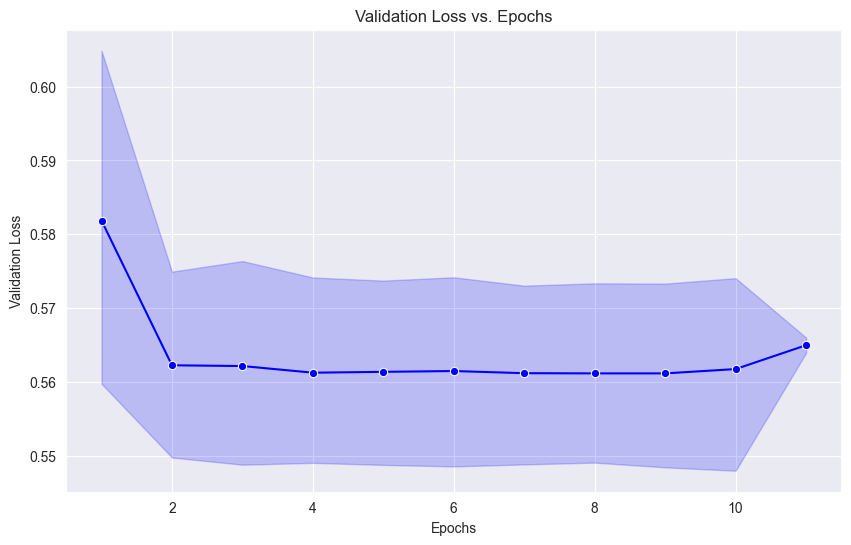

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the Excel file
df = pd.read_excel('microbiology_Validation_loss.xlsx')

# Convert commas to dots in the 'Validation Loss' column
df['Validation Loss'] = df['Validation Loss'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Plot Validation loss as a scatter plot with connected lines using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epochs', y='Validation Loss', marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.grid(True)
plt.show()

## Next...
### Many possible ways to improve, including:
- Using Z score and ACC transformation 
- Using a more complex model 
- Add Attention layer!